# Causal discovery with Census data

## Import libraries

In [1]:
import pickle
import pandas as pd

import cdt
import networkx as nx
import matplotlib.pyplot as plt

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


## Load data

In [2]:
try:
    print(f"Pandas version: {pd.__version__}")
    with open("data/df_causal_discovery.p", "rb") as f:
        df = pickle.load(f)
except:
    print(f"[INFO] The above code doesn't work for pandas >=2.0, downgrading it too 1.5...")
    !conda install pandas=1.5
    print(f"Pandas version: {pd.__version__}")
    with open("data/df_causal_discovery.p", "rb") as f:
        df = pickle.load(f)

df

Pandas version: 1.5.3


,age,hours-per-week,hasGraduateDegree,inRelationship,isWhite,isFemale,greaterThan50k
0,39,40,0,0,1,0,0
1,50,13,0,1,1,0,0
2,38,40,0,0,1,0,0
3,53,40,0,1,0,0,0
5,37,40,1,0,1,1,0
...,...,...,...,...,...,...,...
32556,27,38,0,0,1,1,0
32557,40,40,0,1,1,0,1
32558,58,40,0,0,1,1,0
32559,22,20,0,0,1,0,0


## Create skeleton graph using graph Lasso

For a lot of these causal discovery algorithms, it helps to start off with a graph skeleton. We can do it with `cdt.independence.graph.Glasso()`.

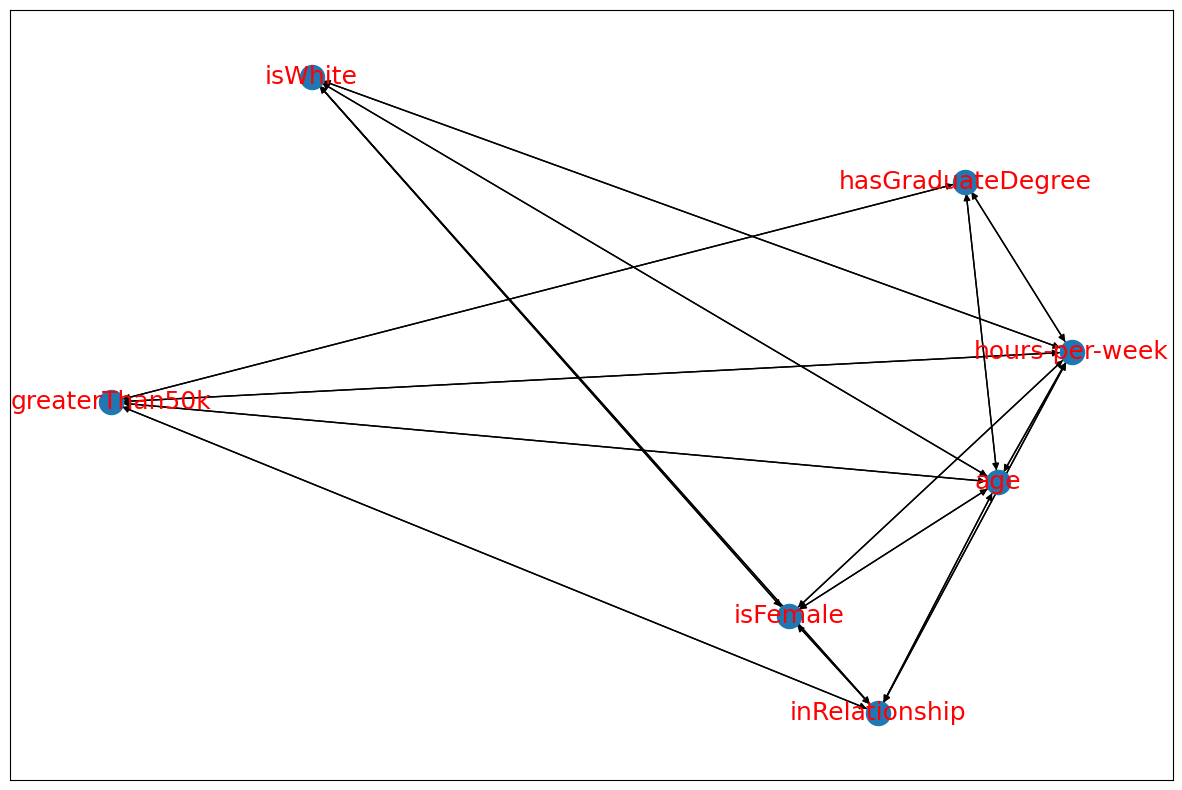

In [3]:
# Initialise graph lasso
glasso = cdt.independence.graph.Glasso()

# Apply graph lasso to the dataset
skeleton = glasso.predict(df)

# Remove self-loops
skeleton.remove_edges_from(nx.selfloop_edges(skeleton))

# Plot the network
fig = plt.figure(figsize=(15, 10))
nx.draw_networkx(skeleton, font_size=18, font_color='r')

## Use Causal discovery algorithms to get a causal model

### 1. PC Algorithm

In [5]:
# Create an instance of a PC model
model_pc = cdt.causality.graph.PC() # note: requires R installed in your system

# Predict on the dataset along with a skeleton
graph_pc = model_pc.predict(df, skeleton) # this outputs a graph

# Plot the graph
fig = plt.figure(figsize=(15, 10))
nx.draw_networkx(graph_pc, font_size=18, font_color='r')

ImportError: R Package (k)pcalg/RCIT is not available. RCIT has to be installed from https://github.com/Diviyan-Kalainathan/RCIT